# Three Solutions to Calculate Confidence Interval

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt 
from scipy.stats import norm
from scipy.stats import gamma

# Contents of this note
## 1. Mathematical derivations
## 2. Examples from different distributions
### - Bernoulli 
### - Exponential
### - Gamma

# Part 1 - Mathematical Derivations

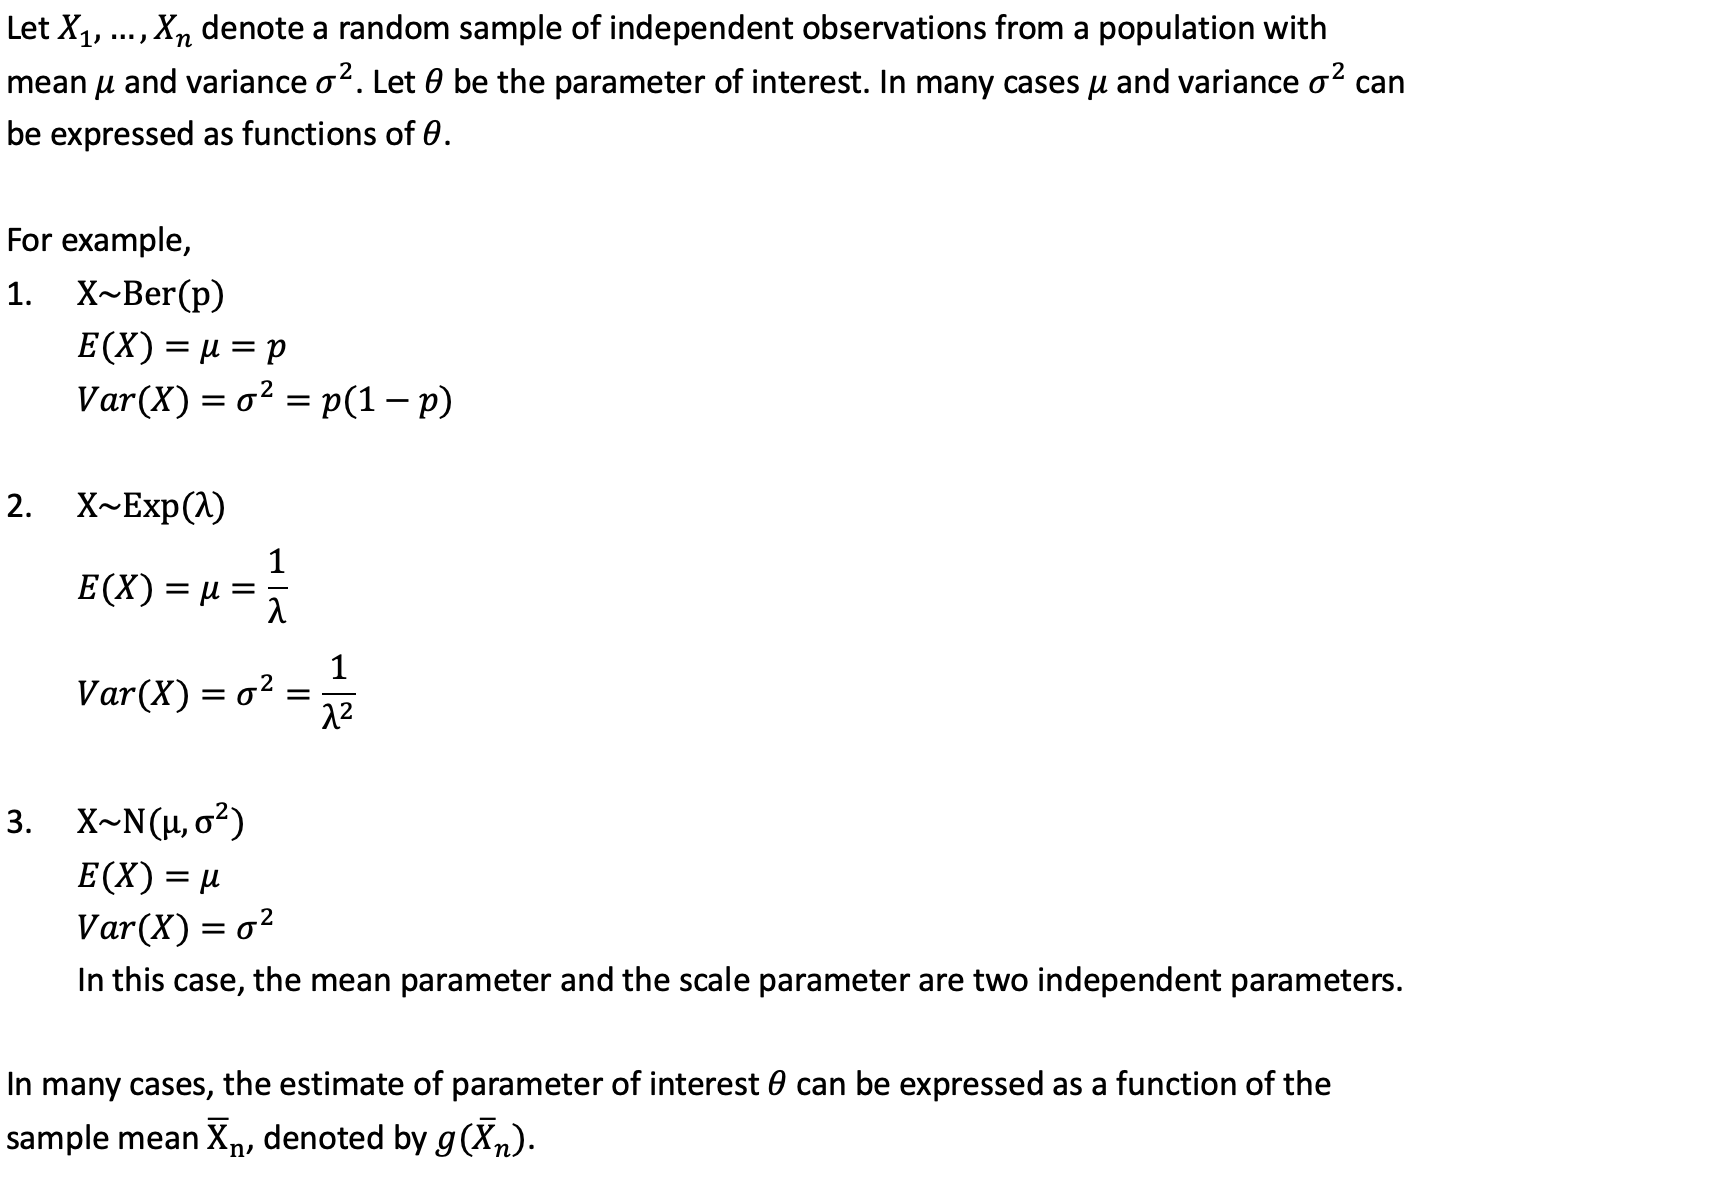

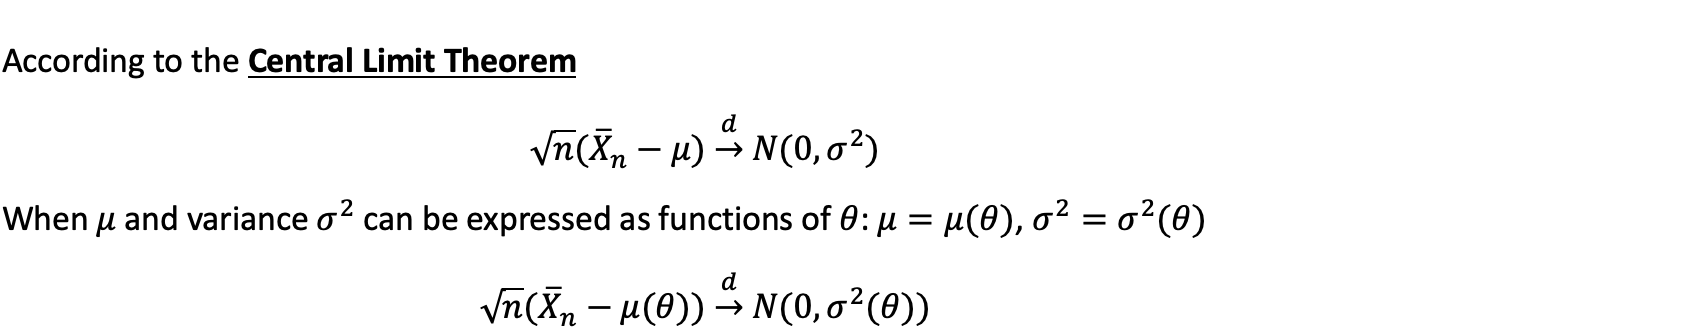

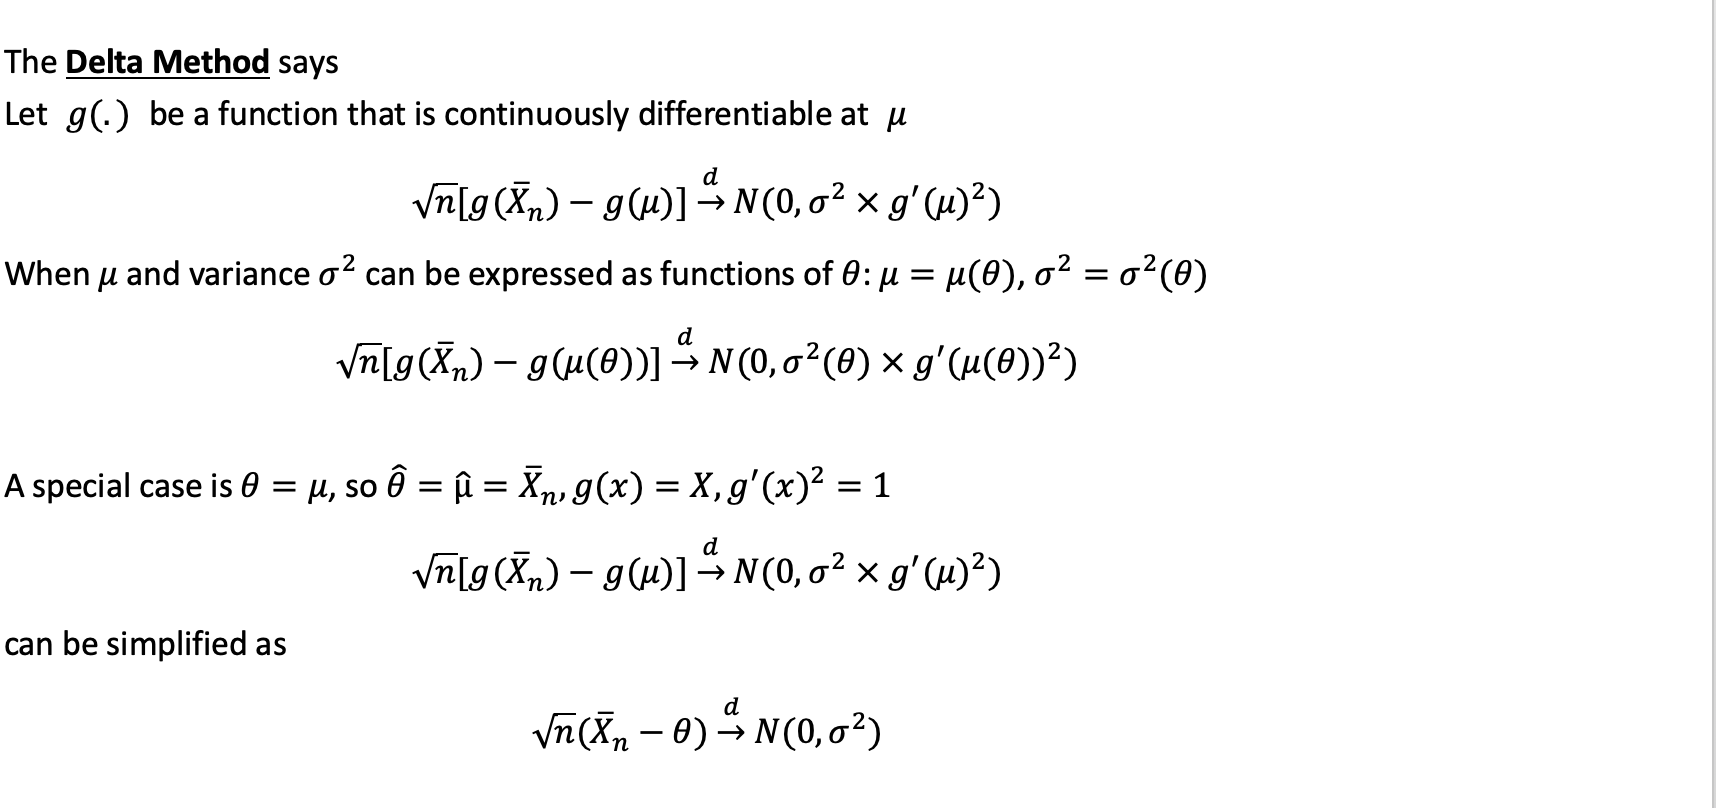

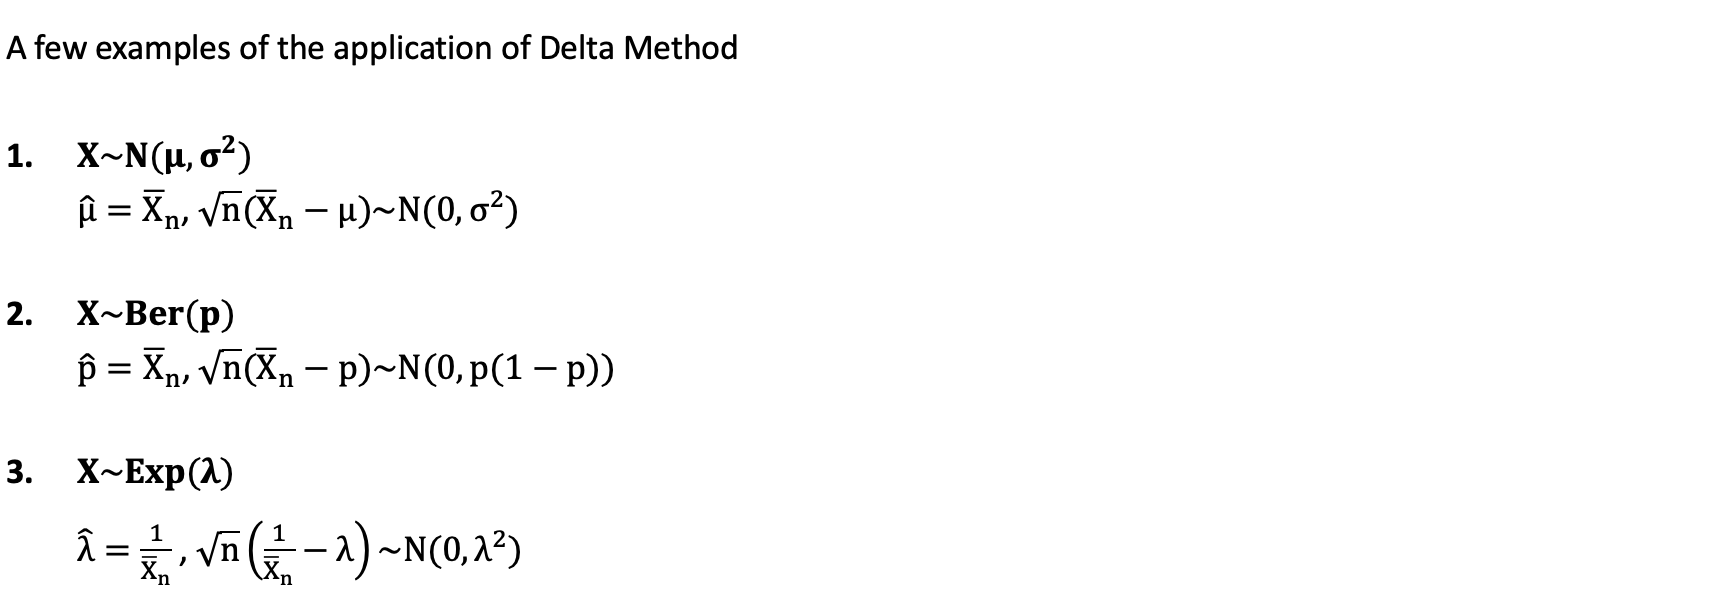

[More detials about Delta Method are discussed here](TO ADD)

# Part 2 - General form of a confidence interval

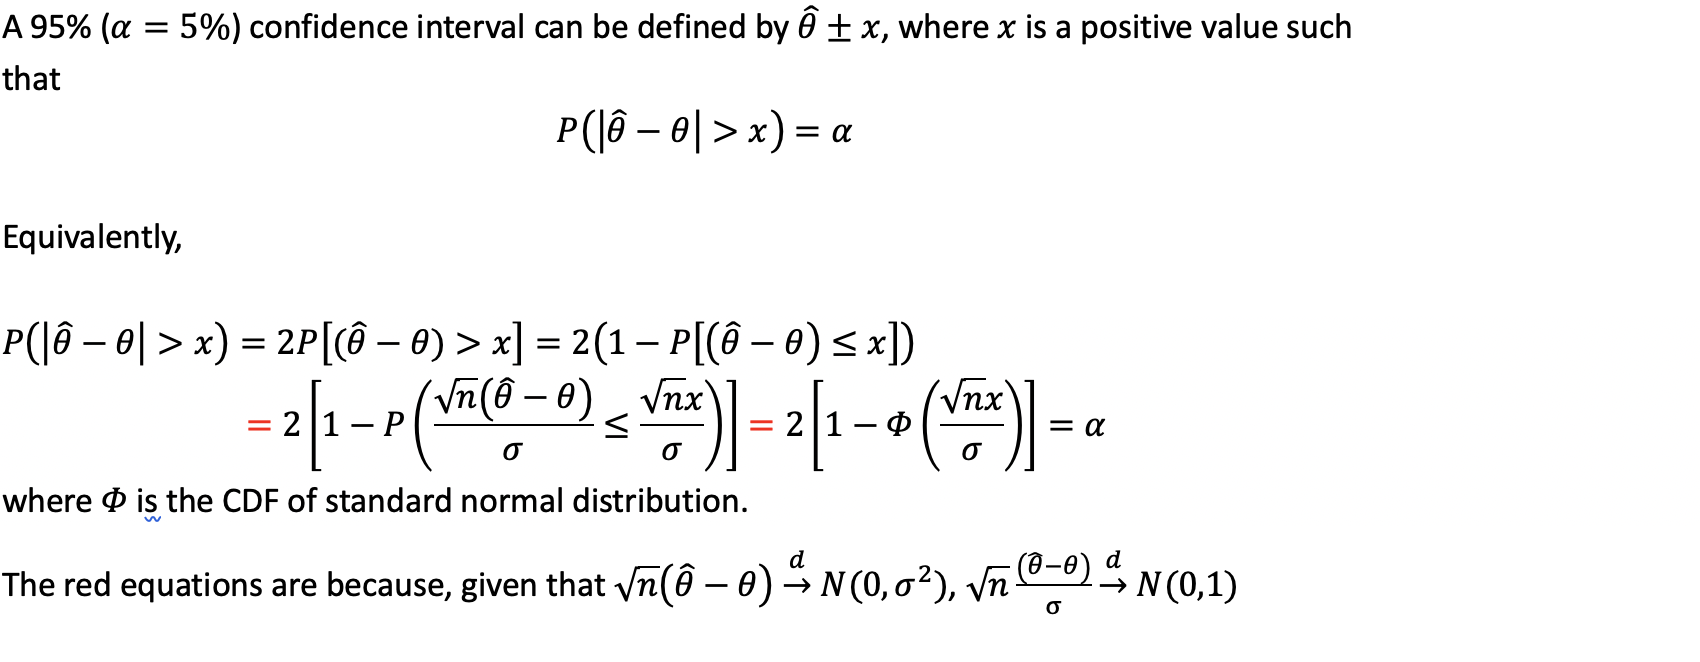

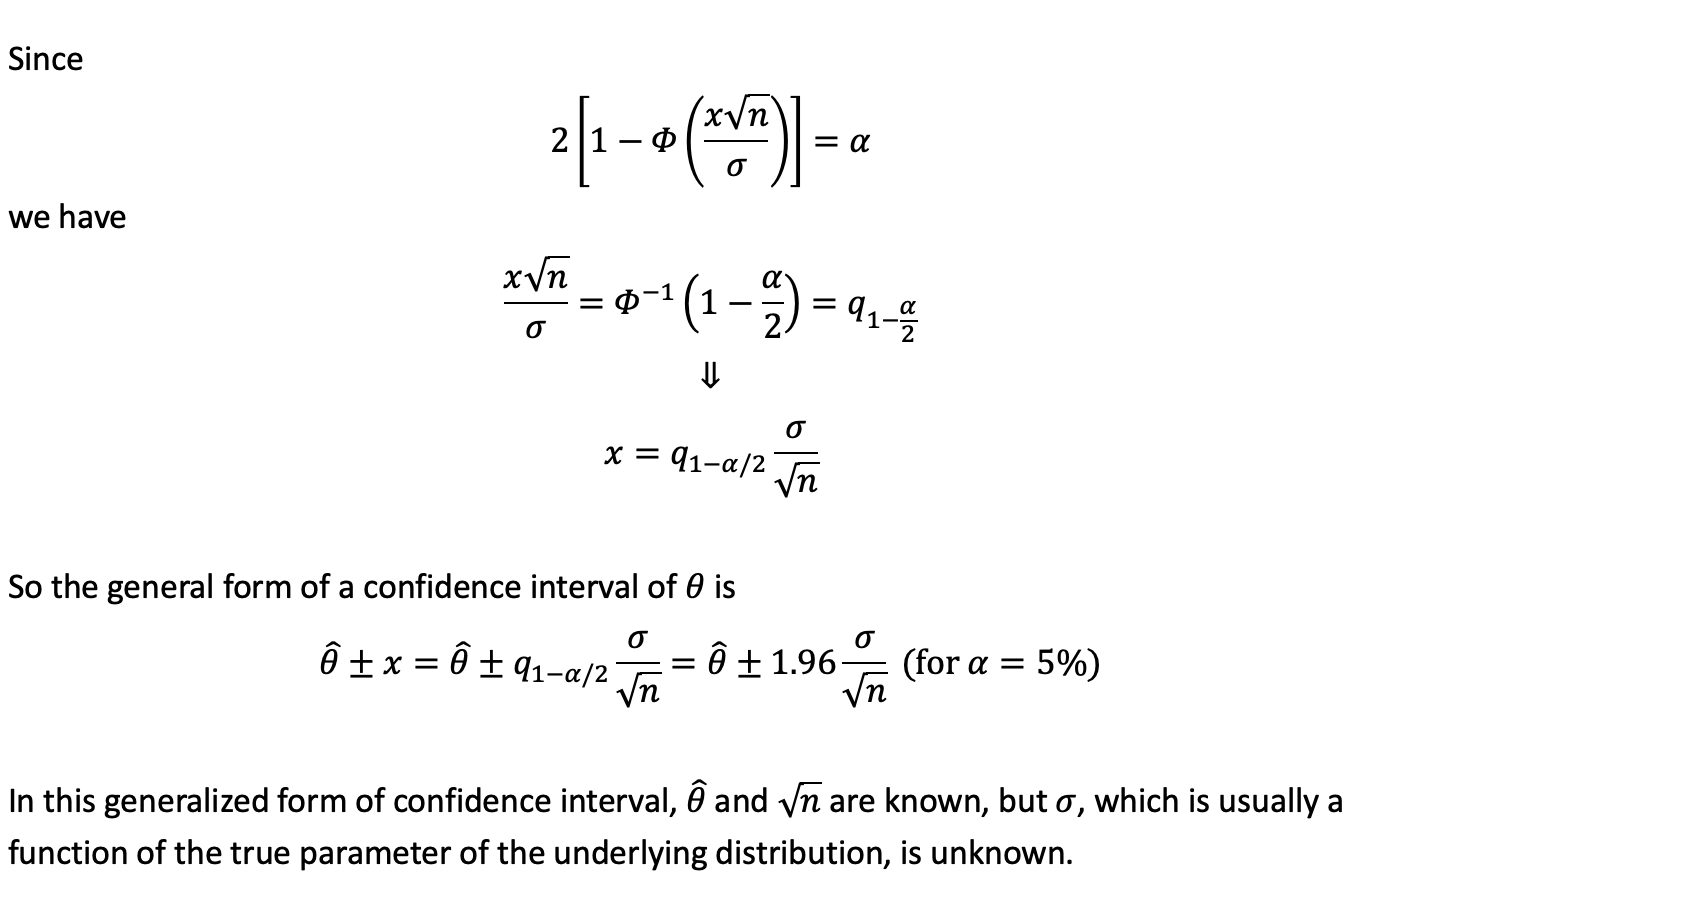

# Part 3 - Three solutions – definitions and general forms

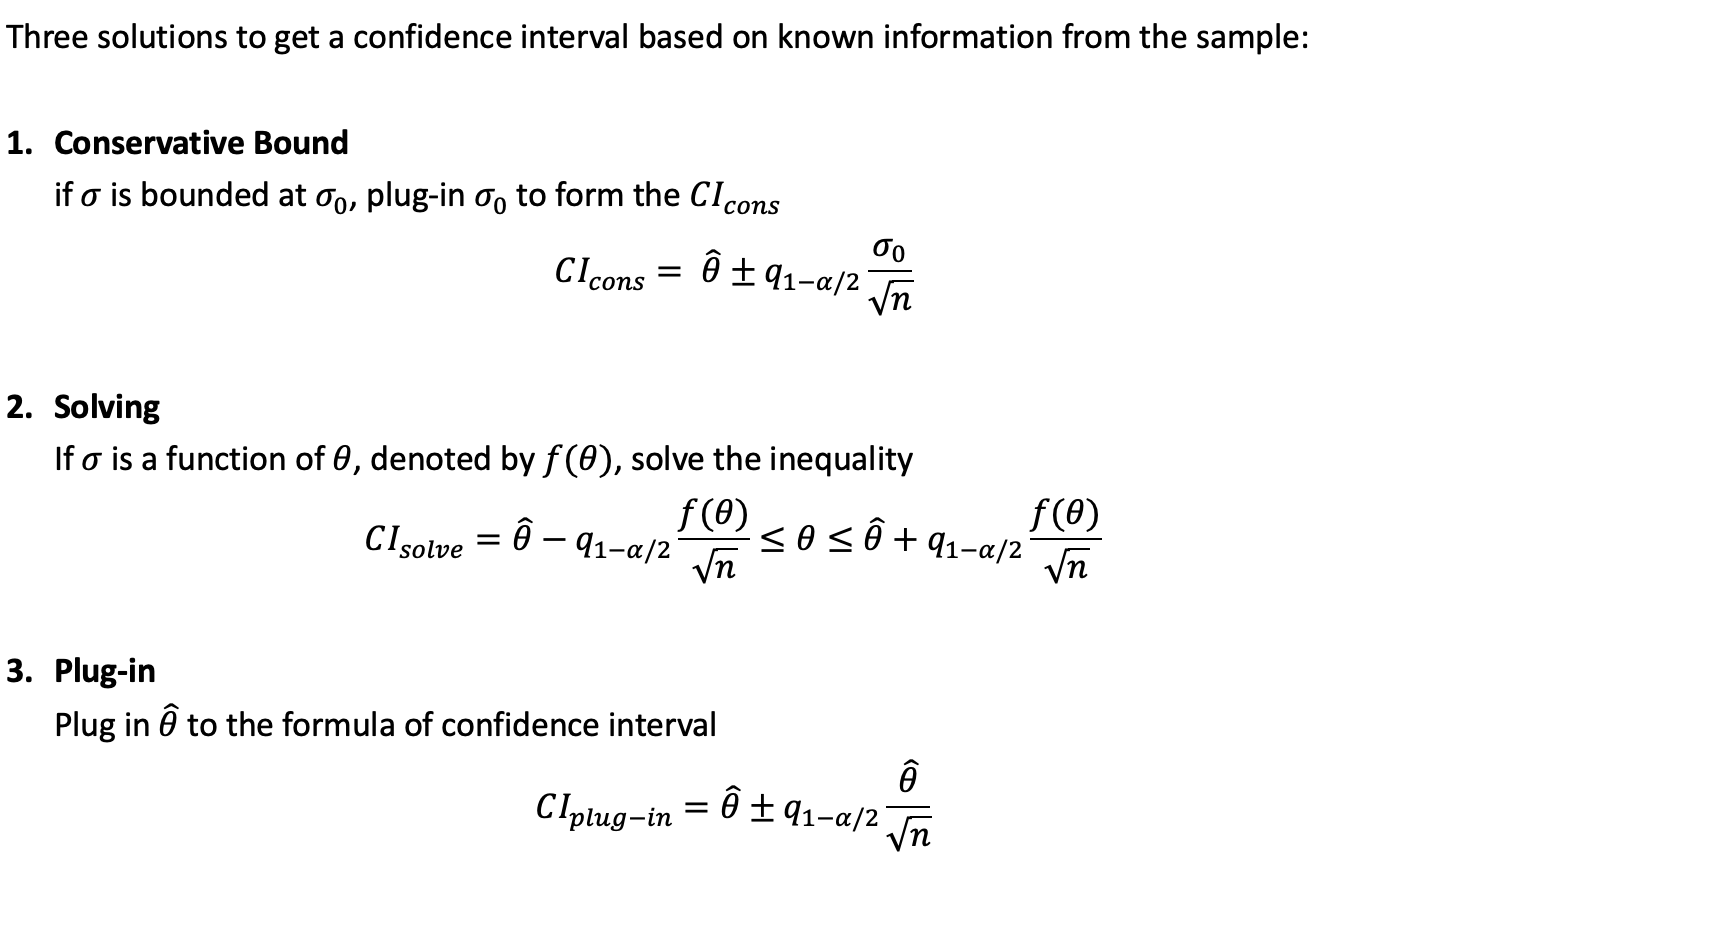

# Part 4 - Three solutions – examples
### In all examples, consider level 90% for confidence intervals (i.e. alpha=10%)

## Example A. Bernoulli (p)

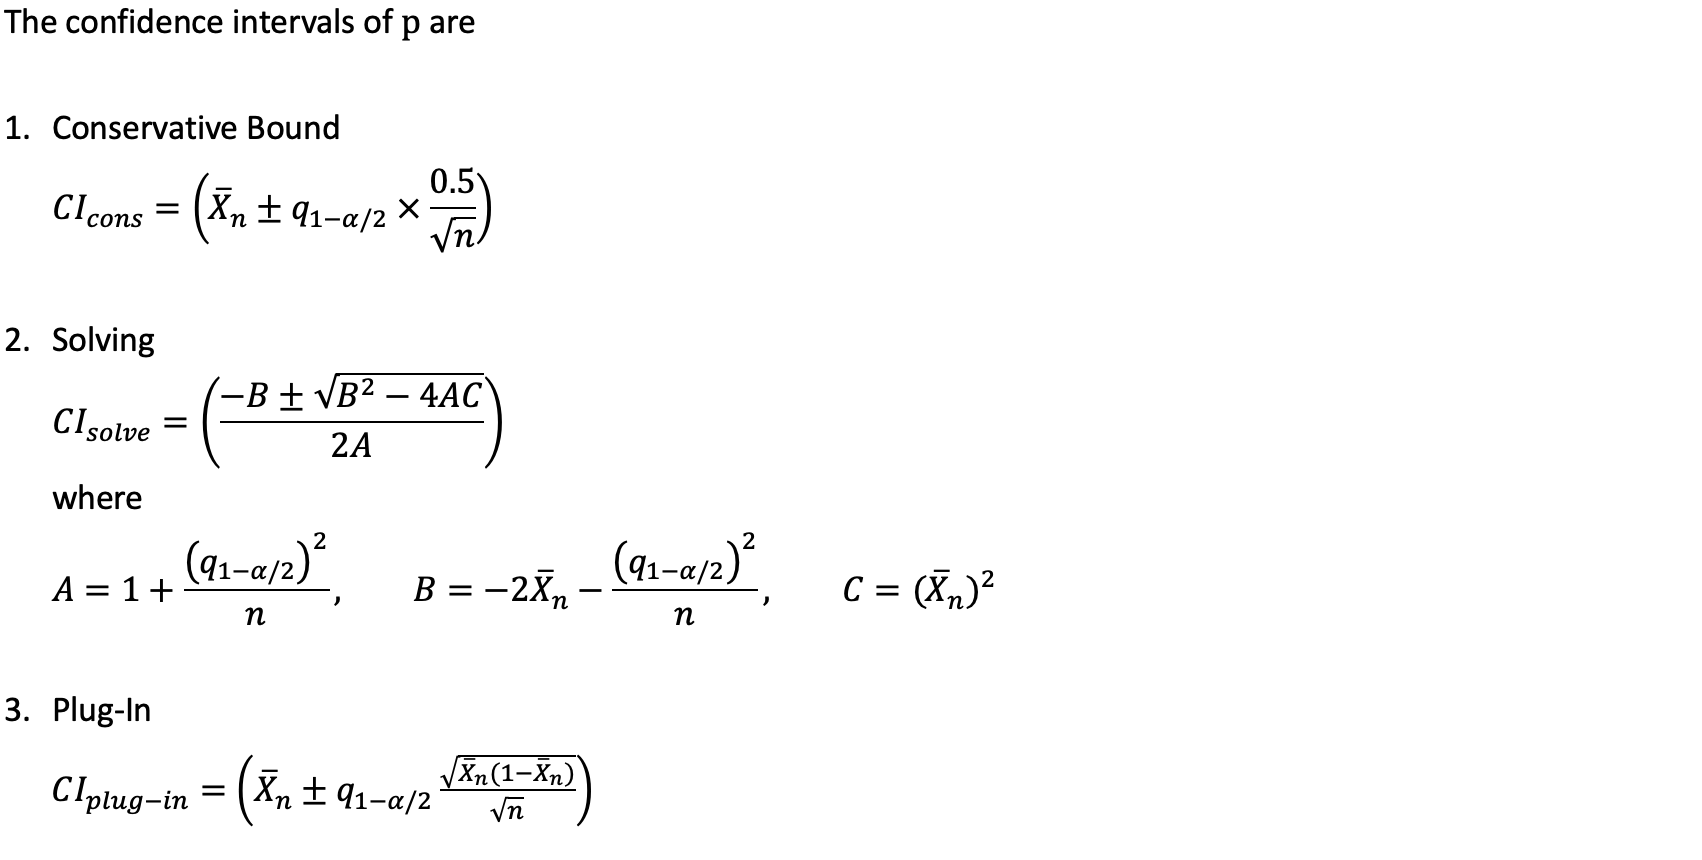

#### [See derivations here](https://github.com/houzhj/Statistics/blob/main/math/01_confidence_interval_derivation.pdf)

### Assume the true value of p is 0.6 (this information is unknown in reality, so it will be used in the derivation of confidence interval). 

In [2]:
### True value(s) of distribution parameter(s)
true_p     = 0.6

### True values of mean and variance of the distribution, derived based on the true value of parameter
true_mean  = true_p
true_var   = true_p*(1-true_p)
true_sigma = np.sqrt(true_var)

### Pre-specified significant level
alpha      = 0.1

### quantile value, will be used in the calculation of confidence intervals
q          = norm.ppf(1-alpha/2)

In [3]:
population = np.random.binomial(n=1, p=true_mean, size=100000)

In [4]:
n_experiment = 1000
sample_size  = 100

In [5]:
### A dataframe used to record whether the real values are within the derived confidence intervals.
true_value_in_ci = pd.DataFrame({'conservative':[np.nan]*n_experiment,
                                 'solve':[np.nan]*n_experiment,
                                 'plugin':[np.nan]*n_experiment})

### A dataframe used to record the boundaries of the confidence intervals.
ci_results       = pd.DataFrame({'conservative_l':[np.nan]*n_experiment,
                                 'conservative_r':[np.nan]*n_experiment,
                                 'solve_l':[np.nan]*n_experiment,
                                 'solve_r':[np.nan]*n_experiment,
                                 'plugin_l':[np.nan]*n_experiment,
                                 'plugin_r':[np.nan]*n_experiment,
                                 'conservative_range':[np.nan]*n_experiment,
                                 'solve_range':[np.nan]*n_experiment,
                                 'plugin_range':[np.nan]*n_experiment,
                                })

### In the loop below, we conducted 1000 experiments. In each experiment, we employed the same methods to construct a confidence intervals:
#### Step 1. A random sample was drawn from the population, with the pre-defined sample size.
#### Step 2. Based on the aforementioned formulas, Confidence Intervals were computed using three methods (if applicable).

### As a result, we obtained 1000 confidence intervals. 

### According to the definition to a confidence intervals of level 90%, we can anticipate that in these 1000 experiments, the true parameter will fall within the confidence intervals in at least 90% of the cases. We verified this is true for all the three types of theconfidence intervals. 

### We also compared the widths of different confidence intervals.

In [6]:
for i in range(n_experiment):
    sample       = np.random.choice(population,size=sample_size,replace=True)
    sample_mean  = np.mean(sample)
    ##### Conservative CI
    ci_conservative_l = sample_mean-q*0.5/np.sqrt(sample_size)
    ci_conservative_r = sample_mean+q*0.5/np.sqrt(sample_size)
    ci_results.loc[i,'conservative_l'] = ci_conservative_l
    ci_results.loc[i,'conservative_r'] = ci_conservative_r
    #print(ci_conservative_l,ci_conservative_r)
    ##### Solve CI
    A            = 1+q**2/sample_size
    B            = -2*sample_mean-q**2/sample_size
    C            = sample_mean**2
    ci_solve_l    = (-B-np.sqrt(B**2-4*A*C))/(2*A)
    ci_solve_r    = (-B+np.sqrt(B**2-4*A*C))/(2*A)
    ci_results.loc[i,'solve_l'] = ci_solve_l
    ci_results.loc[i,'solve_r'] = ci_solve_r
    #print(ci_solve_l,ci_solve_r)
    
    ##### Solve Plug-in 
    ci_plugin_l  = sample_mean-q*np.sqrt(sample_mean*(1-sample_mean))/np.sqrt(sample_size)
    ci_plugin_r  = sample_mean+q*np.sqrt(sample_mean*(1-sample_mean))/np.sqrt(sample_size)
    ci_results.loc[i,'plugin_l'] = ci_plugin_l
    ci_results.loc[i,'plugin_r'] = ci_plugin_r
    #print(ci_plugin_l,ci_plugin_r)
              
    true_value_in_ci.loc[i,'conservative'] = int((ci_conservative_l<=true_p) &(ci_conservative_r>=true_p))
    true_value_in_ci.loc[i,'solve'] = int((ci_solve_l<=true_p) &(ci_solve_r>=true_p))
    true_value_in_ci.loc[i,'plugin'] = int((ci_plugin_l<=true_p) &(ci_plugin_r>=true_p))           

### Percentage of the experiments in which the true parameter falls within the confidence intervals. 

In [7]:
temp = pd.DataFrame(columns=['method','% of true parameter falls within CI'])
temp.iloc[:,0] = ['conservative','solve','plugin']
temp.iloc[:,1] = list(true_value_in_ci.mean())
temp

,method,% of true parameter falls within CI
0,conservative,0.928
1,solve,0.928
2,plugin,0.905


### Comparing the width of the confidence intervals derived using different methods

In [8]:
ci_results['conservative_range'] = ci_results['conservative_r'] -ci_results['conservative_l'] 
ci_results['solve_range']        = ci_results['solve_r'] -ci_results['solve_l'] 
ci_results['plugin_range']       = ci_results['plugin_r'] -ci_results['plugin_l'] 
ci_results['widest']             = ci_results[['conservative_range', 
                                               'solve_range', 
                                               'plugin_range']].apply(lambda x: x.idxmax(), axis=1)
ci_results['narrowest']          = ci_results[['conservative_range', 
                                               'solve_range', 
                                               'plugin_range']].apply(lambda x: x.idxmin(), axis=1)

### In all experiments, "solve" CIs are the narrowest (the top 5 rows are shown).

In [9]:
ci_results.head().round(4)

,conservative_l,conservative_r,solve_l,solve_r,plugin_l,plugin_r,conservative_range,solve_range,plugin_range,widest,narrowest
0,0.4878,0.6522,0.4878,0.6485,0.4886,0.6514,0.1645,0.1607,0.1629,conservative_range,solve_range
1,0.5578,0.7222,0.5583,0.7143,0.5610,0.7190,0.1645,0.1560,0.1579,conservative_range,solve_range
2,0.4878,0.6522,0.4878,0.6485,0.4886,0.6514,0.1645,0.1607,0.1629,conservative_range,solve_range
3,0.4578,0.6222,0.4580,0.6198,0.4580,0.6220,0.1645,0.1618,0.1640,conservative_range,solve_range
4,0.4978,0.6622,0.4978,0.6580,0.4988,0.6612,0.1645,0.1603,0.1624,conservative_range,solve_range


# Example B. Exponential (Lambda) 

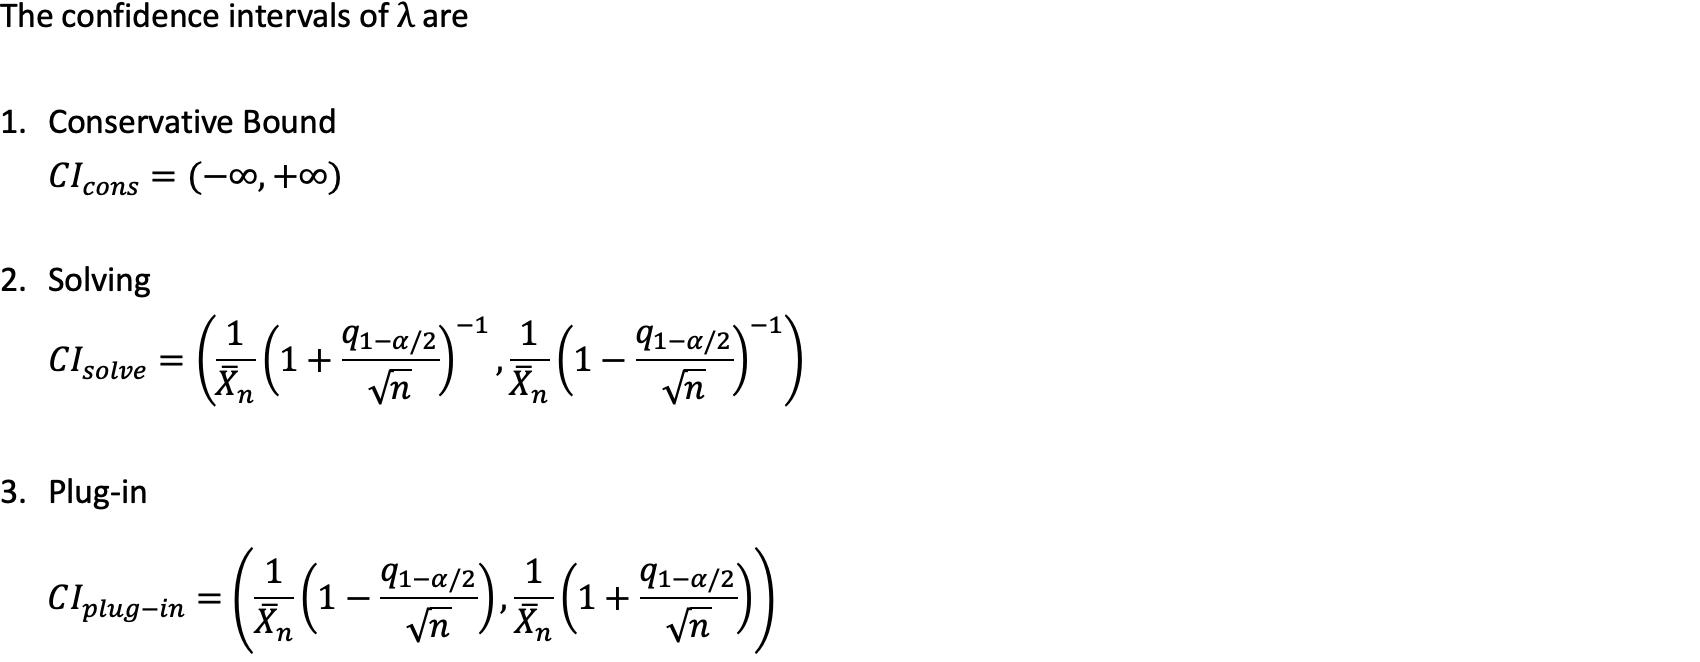

#### [See derivations here](https://github.com/houzhj/Statistics/blob/main/math/01_confidence_interval_derivation.pdf)

In [10]:
### True value(s) of distribution parameter(s)
true_Lambda = 3

### True values of mean and variance of the distribution, derived based on the true value of parameter
true_mean   = 1/true_Lambda
true_var    = 1/(true_Lambda**2)
true_sigma  = np.sqrt(true_var)

### Pre-specified significant level
alpha       = 0.1

### quantile value, will be used in the calculation of confidence intervals
q           = norm.ppf(1-alpha/2)

In [11]:
##### In np.random.exponential, to create a sample of Exp(Lambda), using scale = 1/Lambda
population = np.random.exponential(scale = 1/true_Lambda, size=100000)

In [12]:
n_experiment = 1000
sampel_size  = 100

true_value_in_ci = pd.DataFrame({'conservative':[np.nan]*n_experiment,
                                 'solve':[np.nan]*n_experiment,
                                 'plugin':[np.nan]*n_experiment})
ci_results       = pd.DataFrame({'conservative_l':[np.nan]*n_experiment,
                                 'conservative_r':[np.nan]*n_experiment,
                                 'solve_l':[np.nan]*n_experiment,
                                 'solve_r':[np.nan]*n_experiment,
                                 'plugin_l':[np.nan]*n_experiment,
                                 'plugin_r':[np.nan]*n_experiment,
                                 'conservative_range':[np.nan]*n_experiment,
                                 'solve_range':[np.nan]*n_experiment,
                                 'plugin_range':[np.nan]*n_experiment,
                                })

In [13]:
for i in range(n_experiment):
    sample       = np.random.choice(population,size=sample_size,replace=True)
    sample_mean  = np.mean(sample)
    ##### Conservative CI
    ci_conservative_l = -99999
    ci_conservative_r = 99999
    ci_results.loc[i,'conservative_l'] = ci_conservative_l
    ci_results.loc[i,'conservative_r'] = ci_conservative_r
    #print(ci_conservative_l,ci_conservative_r)
    ##### Solve CI
    ci_solve_l    = (1/sample_mean)/(1+q/np.sqrt(sample_size))
    ci_solve_r    = (1/sample_mean)/(1-q/np.sqrt(sample_size))
    ci_results.loc[i,'solve_l'] = ci_solve_l
    ci_results.loc[i,'solve_r'] = ci_solve_r
    #print(ci_solve_l,ci_solve_r)
    
    ##### Solve Plug-in 
    ci_plugin_l  = (1/sample_mean)*(1-q/np.sqrt(sample_size))
    ci_plugin_r  = (1/sample_mean)*(1+q/np.sqrt(sample_size))
    ci_results.loc[i,'plugin_l'] = ci_plugin_l
    ci_results.loc[i,'plugin_r'] = ci_plugin_r
    #print(ci_plugin_l,ci_plugin_r)
              
    true_value_in_ci.loc[i,'conservative'] = int((ci_conservative_l<=true_Lambda) &(ci_conservative_r>=true_Lambda))
    true_value_in_ci.loc[i,'solve'] = int((ci_solve_l<=true_Lambda) &(ci_solve_r>=true_Lambda))
    true_value_in_ci.loc[i,'plugin'] = int((ci_plugin_l<=true_Lambda) &(ci_plugin_r>=true_Lambda))           

### Percentage of the experiments in which the true parameter falls within the confidence intervals 

In [14]:
temp = pd.DataFrame(columns=['method','% of true parameter falls within CI'])
temp.iloc[:,0] = ['conservative','solve','plugin']
temp.iloc[:,1] = list(true_value_in_ci.mean())
temp

,method,% of true parameter falls within CI
0,conservative,1.000
1,solve,0.915
2,plugin,0.923


### In all experiments, "plugin" CIs are the narrowest (only the top 5 rows are shown).

In [15]:
ci_results['conservative_range'] = ci_results['conservative_r'] -ci_results['conservative_l'] 
ci_results['solve_range'] = ci_results['solve_r'] -ci_results['solve_l'] 
ci_results['plugin_range'] = ci_results['plugin_r'] -ci_results['plugin_l'] 
ci_results['widest']    = ci_results[['conservative_range',
                                      'solve_range',
                                      'plugin_range']].apply(lambda x: x.idxmax(), axis=1)
ci_results['narrowest'] = ci_results[['conservative_range',
                                      'solve_range',
                                      'plugin_range']].apply(lambda x: x.idxmin(), axis=1)
ci_results.head().round(4)

,conservative_l,conservative_r,solve_l,solve_r,plugin_l,plugin_r,conservative_range,solve_range,plugin_range,widest,narrowest
0,-99999.0,99999.0,2.6321,3.6684,2.5609,3.5692,199998.0,1.0363,1.0083,conservative_range,plugin_range
1,-99999.0,99999.0,1.9671,2.7416,1.9138,2.6674,199998.0,0.7745,0.7535,conservative_range,plugin_range
2,-99999.0,99999.0,2.7130,3.7812,2.6396,3.6789,199998.0,1.0682,1.0393,conservative_range,plugin_range
3,-99999.0,99999.0,2.5504,3.5546,2.4814,3.4584,199998.0,1.0042,0.9770,conservative_range,plugin_range
4,-99999.0,99999.0,2.4893,3.4694,2.4219,3.3756,199998.0,0.9801,0.9536,conservative_range,plugin_range


# Example C. Gamma (Alpha,1/Alpha) 
### To distinguish, "Alpha" is the parameter of the distribution, "alpha" is the level of confidence interval.
### Also, there is a simplified setting that "Beta = 1/Alpha" (keep the number of parameters to be 1). So there is only one unknown parameter.

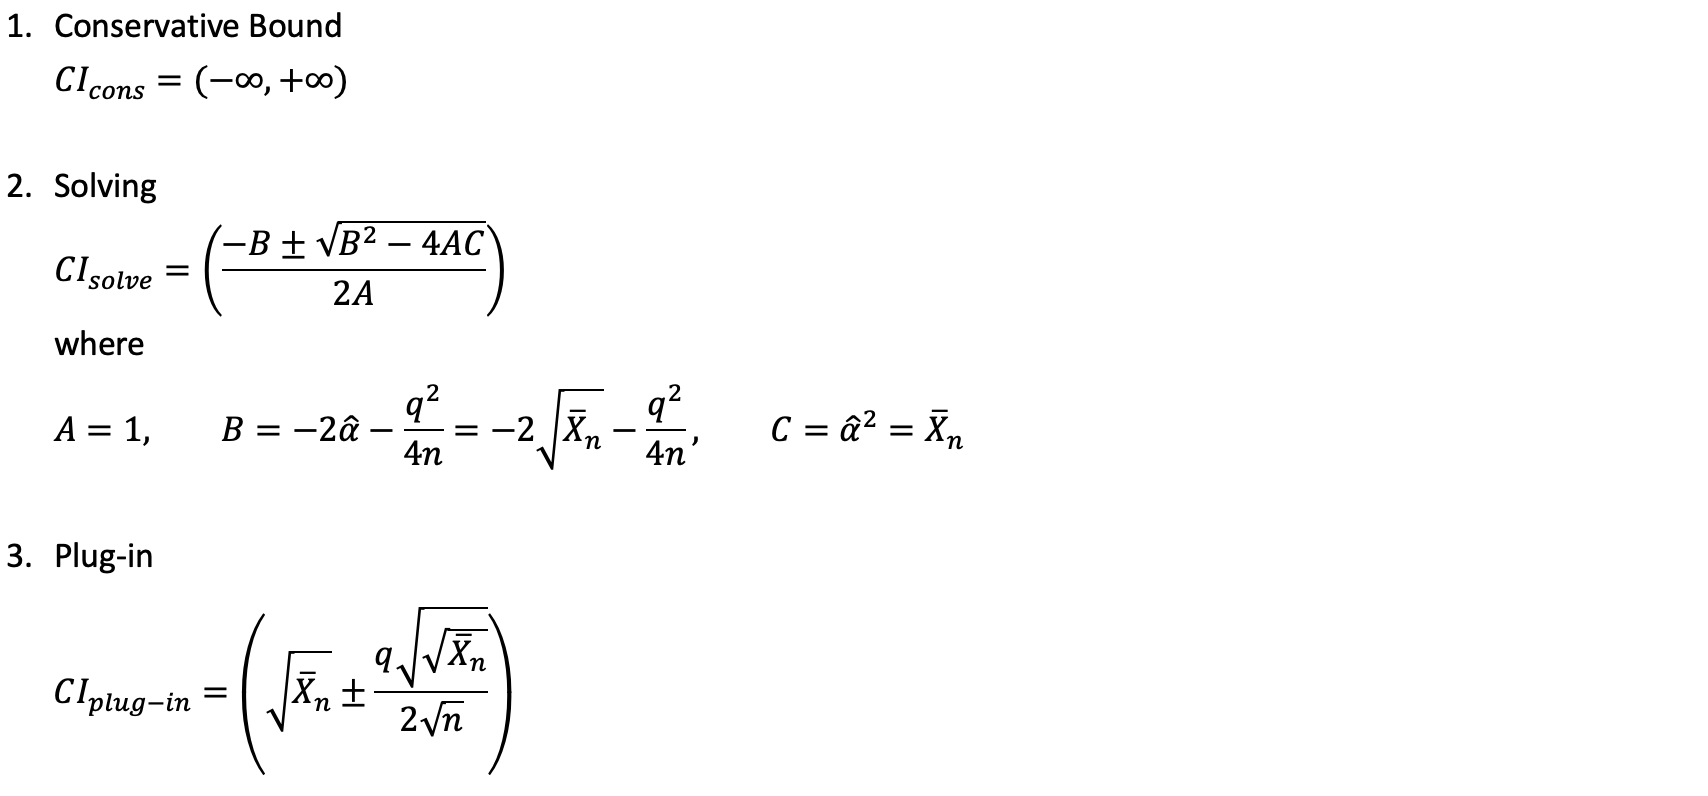

#### [See derivations here](https://github.com/houzhj/Statistics/blob/main/math/01_confidence_interval_derivation.pdf)

In [16]:
### True value(s) of distribution parameter(s)
true_Alpha  = 3
## below is a simplified setting (keep the number of parameters to be 1), not necessarily the case
true_Beta   = 1/true_Alpha 

### True values of mean and variance of the distribution, derived based on the true value of parameter
true_mean   = true_Alpha**2
true_var    = true_Alpha**3
true_sigma  = np.sqrt(true_var)

### Pre-specified significant level
alpha       = 0.1

### quantile value, will be used in the calculation of confidence intervals
q           = norm.ppf(1-alpha/2)

In [17]:
##### In scipy.stats.gamma, to create a sample of Gamma(Alpha,Beta), using a=Alpha, scale = 1/Beta
population = gamma_samples = gamma.rvs(a=true_Alpha, scale=true_Alpha, size=100000)

In [18]:
n_experiment = 1000
sampel_size  = 100

true_value_in_ci = pd.DataFrame({'conservative':[np.nan]*n_experiment,
                                 'solve':[np.nan]*n_experiment,
                                 'plugin':[np.nan]*n_experiment})
ci_results       = pd.DataFrame({'conservative_l':[np.nan]*n_experiment,
                                 'conservative_r':[np.nan]*n_experiment,
                                 'solve_l':[np.nan]*n_experiment,
                                 'solve_r':[np.nan]*n_experiment,
                                 'plugin_l':[np.nan]*n_experiment,
                                 'plugin_r':[np.nan]*n_experiment,
                                 'conservative_range':[np.nan]*n_experiment,
                                 'solve_range':[np.nan]*n_experiment,
                                 'plugin_range':[np.nan]*n_experiment,
                                })

In [19]:
for i in range(n_experiment):
    sample       = np.random.choice(population,size=sample_size,replace=True)
    sample_mean  = np.mean(sample)
    ##### Conservative CI
    ci_conservative_l = -99999
    ci_conservative_r = 99999
    ci_results.loc[i,'conservative_l'] = ci_conservative_l
    ci_results.loc[i,'conservative_r'] = ci_conservative_r
    #print(ci_conservative_l,ci_conservative_r)
    ##### Solve CI
    A            = 1
    B            = -2*np.sqrt(sample_mean)-q**2/(4*sample_size)
    C            = sample_mean
    ci_solve_l    = (-B-np.sqrt(B**2-4*A*C))/(2*A)
    ci_solve_r    = (-B+np.sqrt(B**2-4*A*C))/(2*A)
    ci_results.loc[i,'solve_l'] = ci_solve_l
    ci_results.loc[i,'solve_r'] = ci_solve_r
    #print(ci_solve_l,ci_solve_r)
    
    ##### Solve Plug-in 
    ci_plugin_l  = np.sqrt(sample_mean)-q*np.sqrt(np.sqrt(sample_mean))/(2*np.sqrt(sample_size))
    ci_plugin_r  = np.sqrt(sample_mean)+q*np.sqrt(np.sqrt(sample_mean))/(2*np.sqrt(sample_size))
    ci_results.loc[i,'plugin_l'] = ci_plugin_l
    ci_results.loc[i,'plugin_r'] = ci_plugin_r
    #print(ci_plugin_l,ci_plugin_r)
              
    true_value_in_ci.loc[i,'conservative'] = int((ci_conservative_l<=true_Lambda) &(ci_conservative_r>=true_Lambda))
    true_value_in_ci.loc[i,'solve'] = int((ci_solve_l<=true_Lambda) &(ci_solve_r>=true_Lambda))
    true_value_in_ci.loc[i,'plugin'] = int((ci_plugin_l<=true_Lambda) &(ci_plugin_r>=true_Lambda))           

### Percentage of the experiments in which the true parameter falls within the confidence intervals 

In [20]:
temp = pd.DataFrame(columns=['method','% of true parameter falls within CI'])
temp.iloc[:,0] = ['conservative','solve','plugin']
temp.iloc[:,1] = list(true_value_in_ci.mean())
temp

,method,% of true parameter falls within CI
0,conservative,1.000
1,solve,0.905
2,plugin,0.909


### In all experiments, "plugin" CIs are the narrowest.

In [21]:
ci_results['conservative_range'] = ci_results['conservative_r'] -ci_results['conservative_l'] 
ci_results['solve_range'] = ci_results['solve_r'] -ci_results['solve_l'] 
ci_results['plugin_range'] = ci_results['plugin_r'] -ci_results['plugin_l'] 
ci_results['widest']    = ci_results[['conservative_range',
                                      'solve_range',
                                      'plugin_range']].apply(lambda x: x.idxmax(), axis=1)
ci_results['narrowest'] = ci_results[['conservative_range',
                                      'solve_range',
                                      'plugin_range']].apply(lambda x: x.idxmin(), axis=1)
ci_results.head().round(4)

,conservative_l,conservative_r,solve_l,solve_r,plugin_l,plugin_r,conservative_range,solve_range,plugin_range,widest,narrowest
0,-99999.0,99999.0,2.9596,3.2493,2.9562,3.2459,199998.0,0.2897,0.2897,conservative_range,plugin_range
1,-99999.0,99999.0,2.8716,3.1571,2.8683,3.1537,199998.0,0.2855,0.2854,conservative_range,plugin_range
2,-99999.0,99999.0,3.0558,3.3501,3.0524,3.3466,199998.0,0.2943,0.2942,conservative_range,plugin_range
3,-99999.0,99999.0,2.8658,3.1510,2.8625,3.1476,199998.0,0.2852,0.2851,conservative_range,plugin_range
4,-99999.0,99999.0,2.8746,3.1602,2.8712,3.1568,199998.0,0.2856,0.2856,conservative_range,plugin_range
